# Content Management


<center><img src="./images/content.png" /></center><br>

# Content Management

#### Owners and Administrators

- Add
- Remove 
- Update

## Who Can Publish Content?

- Administrators, Organization Publishers, or Custom Roles with Publishing Enabled.

In [1]:
from arcgis.gis import GIS
from getpass import getpass

In [2]:
password = getpass()
url = 'https://www.arcgis.com/'
username = ''
gis = GIS(url, username, password)

········


## Publishing Content (CSV)

In [4]:
import pandas as pd

In [5]:
csv_path = 'C:\SampleData\capitals.csv'
#read the csv from the path
capitals_df = pd.read_csv(csv_path)
#returns the first 50 rows
capitals_df.head(51)

,Unnamed: 0,city_id,name,state,capital,pop2000,pop2007,longitude,latitude
0,0,1,Honolulu,HI,State,371657,378587,-157.823436,21.305782
1,1,2,Juneau,AK,State,30711,31592,-134.511582,58.351418
2,2,3,Boise City,ID,State,185787,203529,-116.237655,43.613736
3,4,5,Salem,OR,State,136924,152039,-123.029155,44.931109
4,5,6,Carson,NV,State,52457,56641,-119.753873,39.160946
5,6,7,Sacramento,CA,State,407018,462910,-121.468927,38.555609
6,7,8,Phoenix,AZ,State,1321045,1502129,-112.076300,33.528373
7,8,9,Salt Lake City,UT,State,181743,185364,-111.892618,40.754700
8,10,11,Denver,CO,State,554636,578062,-104.965482,39.726291
9,11,12,Santa Fe,NM,State,62203,68975,-105.964573,35.667227


### Add the csv as an item

In [7]:
csv_properties={'title':'Capitals in United States ',
                'description':'US capitals with population',
                'tags':'DC'}
thumbnail_path = r"C:\SampleData\capital_cities.png"

capitals_csv_item = gis.content.add(item_properties=csv_properties, data=csv_path,
                                     thumbnail = thumbnail_path)

<Item title:"Capitals in United States " type:CSV owner:dmart>
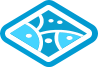

In [8]:
capitals_csv_item

In [9]:
capitals_csv_feature_layer_item = capitals_csv_item.publish()

<Item title:"Capitals in United States " type:Feature Layer Collection owner:dmart>
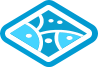

In [10]:
capitals_csv_feature_layer_item 

### Search for the feature layer

In [20]:
search_result = gis.content.search('title:Capitals in United States', item_type= 'Feature Layer')
search_result

[<Item title:"Capitals in United States " type:Feature Layer Collection owner:dmart>]

### Add a map with your search results

In [21]:
map = gis.map('United States')
capitals_csv_item = search_result[0]
map.add_layer(capitals_csv_item)
map

MapView(layout=Layout(height='400px', width='100%'))

# Cloning Items Between Sites

- Copy data from Portal **A** to Portal **B**


In [11]:
from arcgis.gis import GIS

gis_dest = GIS(url="", username='')
gis_source = GIS(url="", username='')

Enter password: ········
Enter password: ········


<Item title:"coffeeshops100" type:Feature Layer Collection owner:dmart>
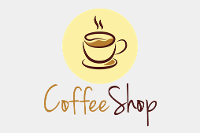

In [12]:
item = gis_source.content.get('632c40c6bbad4dd0be787ffac3b1b884')
item

In [13]:
from IPython.display import display

# Cloning Items Between Sites (continued)


<Item title:"coffeeshops100" type:Feature Layer Collection owner:dmartine23>
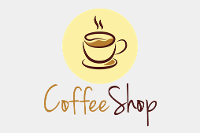

In [14]:
cloned_items = gis_dest.content.clone_items(items=[item], copy_data=True)
for ci in cloned_items:
    display(ci)

In [26]:
for ci in cloned_items:
    ci.delete()

## What works well with Cloning?

* Copying web-tier authenticated users
    * No passwords stored
* Groups and Sharing
* Hosted Feature Services
* Web Apps based on web app templates and WAB
* Many other item types (e.g., Pro Project Packages, File Geodatabases, ShapeFiles, any files that support download)
* Things that the REST API lends itself to easily

## What doesn't work well when cloning?

* Built-in user accounts (no access to passwords)
    * Create all accounts with a default password
* Hosted Tile Services, Map Services, Image Services
    * By URL reference only
* Complicated Story Maps

In [15]:
!conda info -e

# conda environments:
#
arcgispro-py3            C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3
arcgispro-py3-clone   *  C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3-clone
arcgispro-py3_backup     C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3_backup
root                     C:\Program Files\ArcGIS\Pro\bin\Python



## Geocoding on Local Client

In [16]:
from arcgis.geocoding import batch_geocode
from getpass import getpass
import csv

In [17]:
gis = GIS("https://www.arcgis.com", "")

Enter password: ········


In [18]:
help(batch_geocode)

Help on function batch_geocode in module arcgis.geocoding._functions:

batch_geocode(addresses, source_country=None, category=None, out_sr=None, geocoder=None, as_featureset=False)
    The batch_geocode() function geocodes an entire list of addresses.
    Geocoding many addresses at once is also known as bulk geocoding.
    
    ===============     ================================================================
    **Argument**        **Description**
    ---------------     ----------------------------------------------------------------
    addresses           required list of strings or dictionaries.
                        A list of addresses to be geocoded.
                        For passing in the location name as a single line of text -
                        single field batch geocoding - use a string.
                        For passing in the location name as multiple lines of text
                        multifield batch geocoding - use the address fields described
       

In [19]:
# File locations
input_file = 'C://SampleData/NYC_Restaurant_Inspection.csv'
output_file = csv1 = 'C://SampleData/NYC_Restaurant_Inspection_output.csv'

# Specify the column name for addresses
address_column_name = "ADDRESS"

In [20]:
# Load data to a Pandas Dataframe
data = pd.read_csv(input_file, encoding='utf8')
data.head(30)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,CAMIS,DBA,CITY,BUILDING,STREET,ADDRESS,ZIPCODE,...,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,0,0,0,50015075,NEW YORK FRIED CHICKEN,BROOKLYN,102,SARATOGA AVE,102 SARATOGA AVE,11233,...,4/28/2015,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,16.0,B,4/28/2015,3/1/2018,Cycle Inspection / Re-inspection
1,1,1,1,40364529,BEN-BEST DELI & RESTAURANT,QUEENS,9640,QUEENS BOULEVARD,9640 QUEENS BOULEVARD,11374,...,3/24/2016,Violations were cited in the following area(s).,05B,"Harmful, noxious gas or vapor detected. CO ~1 ...",Critical,42.0,C,3/24/2016,3/1/2018,Cycle Inspection / Re-inspection
2,2,2,2,41580756,ROTI ON THE RUN,BROOKLYN,189,NORWOOD AVENUE,189 NORWOOD AVENUE,11208,...,1/25/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,9.0,A,1/25/2018,3/1/2018,Cycle Inspection / Re-inspection
3,3,3,3,50001255,THE MILLING ROOM,MANHATTAN,446,COLUMBUS AVE,446 COLUMBUS AVE,10024,...,7/30/2015,Violations were cited in the following area(s).,06E,"Sanitized equipment or utensil, including in-u...",Critical,28.0,NaN,NaN,3/1/2018,Cycle Inspection / Initial Inspection
4,4,4,4,50016437,CHANG'S FAMILY RESTAURANT,QUEENS,15428,NORTHERN BLVD,15428 NORTHERN BLVD,11354,...,5/27/2015,Violations were cited in the following area(s).,06B,"Tobacco use, eating, or drinking from open con...",Critical,5.0,A,5/27/2015,3/1/2018,Cycle Inspection / Re-inspection
5,5,5,5,50000786,DUNKIN' DONUTS,BROOKLYN,873,FLATBUSH AVENUE,873 FLATBUSH AVENUE,11226,...,12/10/2015,Violations were cited in the following area(s).,09C,Food contact surface not properly maintained.,Not Critical,11.0,A,12/10/2015,3/1/2018,Cycle Inspection / Initial Inspection
6,6,6,6,41319308,EUROPA CAFE,MANHATTAN,2,PARK AVENUE,2 PARK AVENUE,10016,...,2/20/2015,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,2/20/2015,3/1/2018,Cycle Inspection / Initial Inspection
7,7,7,7,50018079,ESPACE,MANHATTAN,635,W 42ND ST,635 W 42ND ST,10036,...,1/10/2018,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,13.0,A,1/10/2018,3/1/2018,Cycle Inspection / Initial Inspection
8,8,8,8,50000768,"BUFFALO WILD WINGS, PEETS COFFEE & TEA, BENTO ...",QUEENS,NKA,JFK INTERNATIONAL AIRPORT,NKA JFK INTERNATIONAL AIRPORT,11430,...,5/14/2015,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,40.0,NaN,NaN,3/1/2018,Cycle Inspection / Initial Inspection
9,9,9,9,50008684,LIZZMONADE,BROOKLYN,1,BROOKLYN BRIDGE PARK,1 BROOKLYN BRIDGE PARK,11201,...,10/7/2015,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,11.0,A,10/7/2015,3/1/2018,Cycle Inspection / Initial Inspection


In [21]:
if address_column_name not in data.columns:
    raise ValueError("Missing Address column in input data")

In [22]:
addresses = (data[address_column_name]+ ", " + data['CITY'] + ", " + data['STATE']).tolist()

In [23]:
addresses

['102 SARATOGA AVE, BROOKLYN, NY',
 '9640 QUEENS BOULEVARD, QUEENS, NY',
 '189 NORWOOD AVENUE, BROOKLYN, NY',
 '446 COLUMBUS AVE, MANHATTAN, NY',
 '15428 NORTHERN BLVD, QUEENS, NY',
 '873 FLATBUSH AVENUE, BROOKLYN, NY',
 '2 PARK AVENUE, MANHATTAN, NY',
 '635 W 42ND ST, MANHATTAN, NY',
 'NKA JFK INTERNATIONAL AIRPORT, QUEENS, NY',
 '1 BROOKLYN BRIDGE PARK, BROOKLYN, NY',
 '755 TARGEE ST, STATEN ISLAND, NY',
 '100 MAIDEN LANE, MANHATTAN, NY',
 '16 GRAMERCY PARK SOUTH, MANHATTAN, NY',
 '222 LEXINGTON AVENUE, MANHATTAN, NY',
 '135 WESTCHESTER SQ, BRONX, NY',
 '3606 DITMARS BLVD, QUEENS, NY',
 '890 WYCKOFF AVE, BROOKLYN, NY',
 '4882 ARTHUR KILL RD, STATEN ISLAND, NY',
 '3033 CONEY ISLAND AVENUE, BROOKLYN, NY',
 '1714 2ND AVE, MANHATTAN, NY',
 '1185 BEDFORD AVENUE, BROOKLYN, NY',
 '6841 MYRTLE AVE, QUEENS, NY',
 '377 BEACH   92 STREET, QUEENS, NY',
 '401 WEST   47 STREET, MANHATTAN, NY',
 '513 GRAND ST, BROOKLYN, NY',
 '3766 103RD ST, QUEENS, NY',
 '4149 150 STREET, QUEENS, NY',
 '79-16 21 A

In [24]:
results = batch_geocode(addresses)

In [25]:
results

[{'address': '102 Saratoga Ave, Brooklyn, New York, 11233',
  'location': {'x': -73.91723625199995, 'y': 40.68299168800007},
  'score': 100,
  'attributes': {'ResultID': 0,
   'Loc_name': 'World',
   'Status': 'M',
   'Score': 100,
   'Match_addr': '102 Saratoga Ave, Brooklyn, New York, 11233',
   'LongLabel': '102 Saratoga Ave, Brooklyn, NY, 11233, USA',
   'ShortLabel': '102 Saratoga Ave',
   'Addr_type': 'PointAddress',
   'Type': '',
   'PlaceName': '',
   'Place_addr': '102 Saratoga Ave, Brooklyn, New York, 11233',
   'Phone': '',
   'URL': '',
   'Rank': 20,
   'AddBldg': '',
   'AddNum': '102',
   'AddNumFrom': '',
   'AddNumTo': '',
   'AddRange': '',
   'Side': 'L',
   'StPreDir': '',
   'StPreType': '',
   'StName': 'Saratoga',
   'StType': 'Ave',
   'StDir': '',
   'BldgType': '',
   'BldgName': '',
   'LevelType': '',
   'LevelName': '',
   'UnitType': '',
   'UnitName': '',
   'SubAddr': '',
   'StAddr': '102 Saratoga Ave',
   'Block': '',
   'Sector': '',
   'Nbrhd': 'Bed

In [26]:
map = gis.map("New York", 7)
map

MapView(layout=Layout(height='400px', width='100%'), zoom=7.0)

In [27]:
for address in results:
    popup = {
        "title" : address['attributes']['ShortLabel'],
        "content" : "City: " + address['attributes']['City'] + "<br>" "X:"+ str(address['location']['x']) + "<br>" "Y: " + str(address['location']['y']) 
            }
    map.draw(address['location'], popup)

In [28]:
latcoords= []
longcoords= []

for coordinates in results:
    latitude ="{:.3f}".format( float( int(coordinates[ 'location'][ 'y'] * 100)) /100)
    longitude ="{:.3f}".format( float( int(coordinates[ 'location'][ 'x'] * 100)) /100)
    latcoords.append(latitude)
    longcoords.append(longitude)

In [29]:
data['Long']=longcoords
data["Lat"]=latcoords
data.head(30)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,CAMIS,DBA,CITY,BUILDING,STREET,ADDRESS,ZIPCODE,...,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Long,Lat
0,0,0,0,50015075,NEW YORK FRIED CHICKEN,BROOKLYN,102,SARATOGA AVE,102 SARATOGA AVE,11233,...,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,16.0,B,4/28/2015,3/1/2018,Cycle Inspection / Re-inspection,-73.910,40.680
1,1,1,1,40364529,BEN-BEST DELI & RESTAURANT,QUEENS,9640,QUEENS BOULEVARD,9640 QUEENS BOULEVARD,11374,...,05B,"Harmful, noxious gas or vapor detected. CO ~1 ...",Critical,42.0,C,3/24/2016,3/1/2018,Cycle Inspection / Re-inspection,-73.860,40.720
2,2,2,2,41580756,ROTI ON THE RUN,BROOKLYN,189,NORWOOD AVENUE,189 NORWOOD AVENUE,11208,...,10F,Non-food contact surface improperly constructe...,Not Critical,9.0,A,1/25/2018,3/1/2018,Cycle Inspection / Re-inspection,-73.870,40.680
3,3,3,3,50001255,THE MILLING ROOM,MANHATTAN,446,COLUMBUS AVE,446 COLUMBUS AVE,10024,...,06E,"Sanitized equipment or utensil, including in-u...",Critical,28.0,NaN,NaN,3/1/2018,Cycle Inspection / Initial Inspection,-73.970,40.780
4,4,4,4,50016437,CHANG'S FAMILY RESTAURANT,QUEENS,15428,NORTHERN BLVD,15428 NORTHERN BLVD,11354,...,06B,"Tobacco use, eating, or drinking from open con...",Critical,5.0,A,5/27/2015,3/1/2018,Cycle Inspection / Re-inspection,-73.810,40.760
5,5,5,5,50000786,DUNKIN' DONUTS,BROOKLYN,873,FLATBUSH AVENUE,873 FLATBUSH AVENUE,11226,...,09C,Food contact surface not properly maintained.,Not Critical,11.0,A,12/10/2015,3/1/2018,Cycle Inspection / Initial Inspection,-73.950,40.650
6,6,6,6,41319308,EUROPA CAFE,MANHATTAN,2,PARK AVENUE,2 PARK AVENUE,10016,...,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,2/20/2015,3/1/2018,Cycle Inspection / Initial Inspection,-73.980,40.740
7,7,7,7,50018079,ESPACE,MANHATTAN,635,W 42ND ST,635 W 42ND ST,10036,...,04N,Filth flies or food/refuse/sewage-associated (...,Critical,13.0,A,1/10/2018,3/1/2018,Cycle Inspection / Initial Inspection,-73.990,40.760
8,8,8,8,50000768,"BUFFALO WILD WINGS, PEETS COFFEE & TEA, BENTO ...",QUEENS,NKA,JFK INTERNATIONAL AIRPORT,NKA JFK INTERNATIONAL AIRPORT,11430,...,10F,Non-food contact surface improperly constructe...,Not Critical,40.0,NaN,NaN,3/1/2018,Cycle Inspection / Initial Inspection,-73.790,40.640
9,9,9,9,50008684,LIZZMONADE,BROOKLYN,1,BROOKLYN BRIDGE PARK,1 BROOKLYN BRIDGE PARK,11201,...,04N,Filth flies or food/refuse/sewage-associated (...,Critical,11.0,A,10/7/2015,3/1/2018,Cycle Inspection / Initial Inspection,-73.980,40.690


In [30]:
pd.DataFrame(data).to_csv(output_file, encoding='utf8')
len(results)

99